<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S6_1_0_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron « from scratch »

Dans cet exercice nous allons recoder un neurone ou perceptron. Cela vous permettra de voir plus précisément comment les réseaux de neurones fonctionnent.

1. Importez `pandas`, `numpy` et `matplotlib.pyplot` :

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

Un perceptron est composé d'une somme pondérée des entrées plus un biais qui sont ensuite passés dans une fonction non-linéaire ou fonction d'activation.

### Fonction d'activation

Nous sommes dans le cas d'une classification binaire. Nous allons donc utiliser la **sigmoïde** dont la formule est la suivante :

$$
\sigma(x)=\frac{1}{1 + e^{- x}}
$$

2. À partir de la formule ci-dessus complétez la fonction suivante :

In [0]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

3. Nous allons avoir besoin de la dérivée de la sigmoïde dont voici la formule :

$$
\frac{d\sigma (x)}{d(x)} = \sigma (x)\cdot (1-\sigma(x))
$$

In [0]:
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

4. Visualisons cette fonction. Pour faire cela, créez une variable `val_x` contenant des valeurs allant de `-10` à `10` avec un pas de `0.1` (regardez du côté de `np.arange` par exemple). Calculez les valeurs correspondantes avec votre fonction sigmoïde ainsi que pour sa dérivée. Affichez le tout !

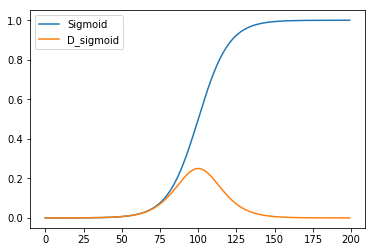

In [9]:
val_x = np.arange(-10, 10, 0.1)
sig = [sigmoid(i) for i in val_x]
d_sig = [d_sigmoid(i) for i in val_x]
plt.plot(sig, label= "Sigmoid")
plt.plot(d_sig, label= "D_sigmoid")
plt.legend()
plt.show()

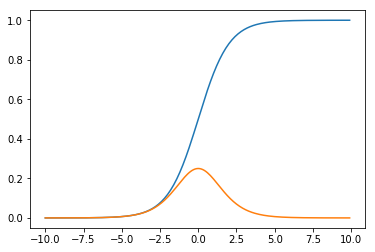

### Forward propagation

Cette phase correspond à la phase de prédiction du neurone. Nous allons traverser le neurone pour calculer sa sortie.

La formule générale est donnée par :

$$
Z = W * X + b
\\
A = g(Z)
$$

$Z$ représente donc la somme pondérée des entrées du neurone et $A$ la sortie du neurone (c'est à dire après être passé par la fonction d'activation).

5. Implémentez la fonction `forward_propagation` à partir de la formule ci-dessus :

In [0]:
def forward_propagation(inputs, weights, bias):
  Z = np.dot(inputs, weights)+bias #==> inputs @ weights
  #return sigmoid(sum([a*b for a,b in zip(inputs,weights)]) + bias)
  return sigmoid(Z)


### Backward propagation

Une fois que le neurone a fait une prédiction, nous allons regarder l'erreur qu'il a effectué et rectifier les paramètres en conséquence.

Cela se déroule en deux phase :

- calcule des dérivées partielles,
- mise à jour des paramètres.

Nous allons utiliser la fonction de coût MSE, dont voici la formule :

$$
MSE = \frac{\mathrm{1} }{\mathrm{n}} \sum\nolimits_{i=1}^{n} (predicted - observed)^{2}
$$

6. Implémentez la fonction de coût suivante :

In [0]:
def cost(predicted, observed):
    #n = len(predicted)
    #return sum([(a-b)**2 for a,b in zip(predicted,observed)])/n
    return np.mean(np.square(predicted-observed))

Nous allons ensuite prendre la dérivée partielle du coût en fonction des paramètres. Grâce à la « _chain rule_ », nous allons pouvoir dériver cela de la manière suivante :

$$
\frac {\partial cost}{\partial w} = \frac {\partial cost}{\partial pred} \times \frac {\partial pred}{\partial z} \times \frac {\partial z}{\partial w}
$$

où :

$$
\frac {\partial cost}{\partial pred} = (predicted - observed)
\\
\frac {\partial pred}{\partial z} = \frac{d\sigma (x)}{d(x)}
$$

7. À partir des étapes ci-dessus, implémentez la fonction suivante :

In [0]:
def backward_propagation(predictions, observed):
    #dcost_dpred = [a-b for a,b in zip(predictions,observed)]
    dcost_dpred = predictions - observed
    #dpred_dz = [d_sigmoid(i) for i in predictions]
    dpred_dz = d_sigmoid(predictions)
    return dcost_dpred * dpred_dz
    #return [a*b for a,b in zip(dcost_dpred, dpred_dz)]

Ensuite, nous mettons à jour les poids simultanément de la manière suivante :

$$
weights =: weights - \gamma (\frac {\partial cost}{\partial pred} \times \frac {\partial pred}{\partial z} \times \frac {\partial z}{\partial w})
\\
bias =: bias - \gamma (\frac {\partial cost}{\partial pred} \times \frac {\partial pred}{\partial z})
$$

8. Complétez la fonction pour mettre à jour les poids :

In [0]:
def update_parameters(weights, bias, update, inputs, lr=0.01):
    weights -=  lr*np.dot(inputs.T, update)/len(update)
    bias -= lr * np.mean(update) 
    return weights, bias

### Entraînement

Nous avons maintenant tout ce qu'il faut pour entrainer notre perceptron. Il faut que nous initialisions les paramètres et le biais.

9. Complétez la fonction suivante en utilisant `np.random.rand` afin d'initialiser les paramètres et le biais :

In [0]:
def init_weights(input_shape):
    weights = np.random.rand(input_shape,1)*0.01
    bias = np.random.rand(1)
    return weights, bias

Ça y est ! Nous y sommes. Nous allons implémenter la fonction d'entraînement de notre perceptron. Souvenez-vous de l'ordre des opérations :

1. forward propagation
2. backward propagation
3. mise à jour des paramètres

Et cela durant un nombre déterminé d'itérations jusqu'à convergence.

10. Implémentez la fonction `training` ci-dessous :

In [0]:
def training(inputs, labels, epochs=100):
    cost_list = list()
    weights, bias = init_weights(inputs.shape[1])
    for i in range(epochs):
      predictions = forward_propagation(inputs, weights, bias)
      cost_list.append(cost(predictions, labels))
      update = backward_propagation(predictions, labels)
      weights, bias = update_parameters(weights, bias, update, inputs)
      #print ("Epoch {}/{}: loss - {}".format(i, epochs, cost(f, inputs)))
    return cost_list, weights, bias
    

Nous allons entraîner notre perceptron sur un petit dataset issu du [MNIST](http://yann.lecun.com/exdb/mnist/). C'est un dataset historique qui contient des images de chiffres écrites à la main. Chacune des images est en noir et blanc et de dimension (28, 28).

11. Chargez le fichier `src/train.csv` :

In [22]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [23]:
df = pd.read_csv('/content/drive/My Drive/Perceptron_train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


12. Séparez la colonne `label` dans une variable `Y` et le reste dans une variable `X` :

In [26]:
X = df.iloc[:, 1:]
Y = df.iloc[:, :1]
Y.head()

,label
0,1
1,0
2,1
3,0
4,0


((8816, 1), (8816, 784))

13. Profitez-en pour regarder à quoi ressemble ces images :

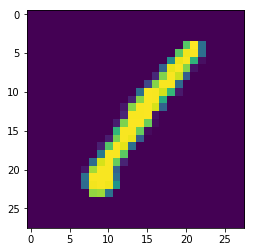

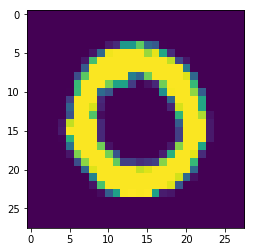

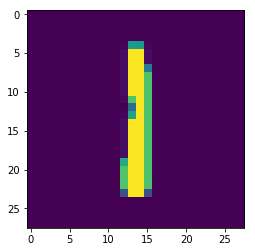

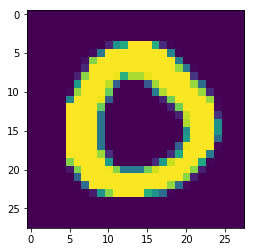

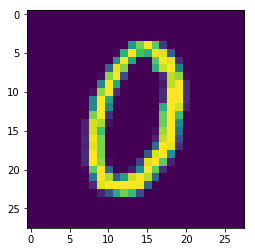

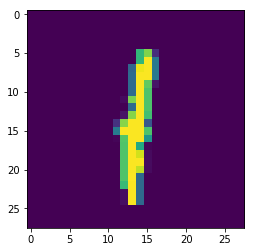

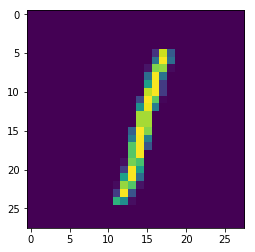

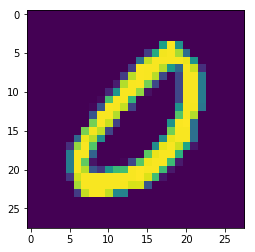

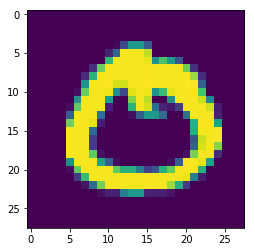

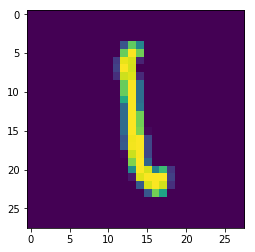

In [40]:
for i in range(10):
    plt.imshow(X.get_values()[i].reshape(28,28))
    plt.show()

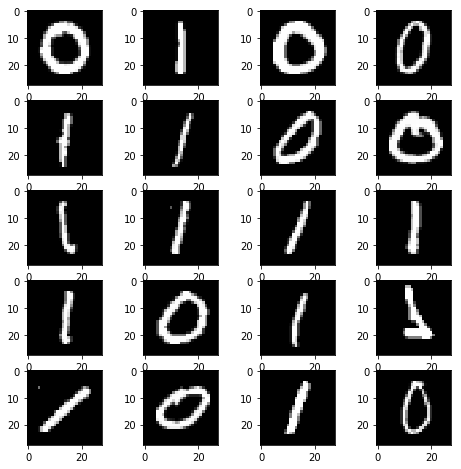

14. Utilisez `training` pour entraîner votre perceptron !

In [76]:
cost, w, b = training(X.values,Y.values, 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [0]:
forward_propagation(X,w, b)

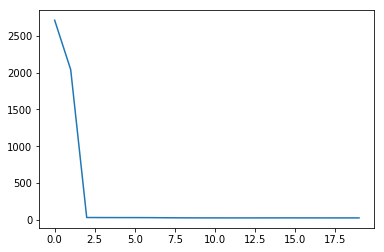

Félicitations ! Vous avez codé votre premier neurone !

Bien entendu il est très perfectible. Nous vous invitons à revenir dessus tant que vous voulez et à l'améliorer. Par exemple en :

- utilisant des classes Python
- ajoutant des couches de neurones
- créant d'autres fonctions d'activation
- ...